<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/p_93_p_106.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**소프트맥스 함수 구현 시 주의점**

In [24]:
# softmax() 함수의 코드는 커뮾터로 계산할 때는 결함이 있습니다. : 오버플로 문제
# 소프트맥스 함수는 지수 함수를 사용하는데, 지수 함수란 것이 쉽게 아주 큰 값을 내뱉죠.

# 컴퓨터: 수를 4바이트나 8바이트와 같이 크기가 유한한 데이터로 다룹니다. 다시 말해, 표현할 수 있는 수의 범위가 한정되어
# 너무 큰 값은 표현할 수 없다는 문제가 발생합니다. 이것을 오버플로(overflow)라 하며, 컴퓨터로 수치를 계산할 때 주의할 점입니다.

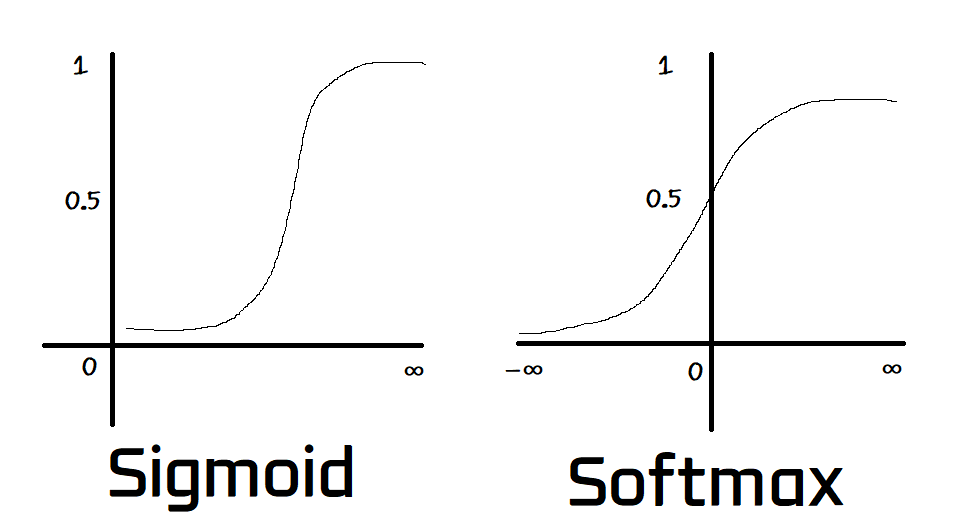

In [25]:
import numpy as np
a=np.array([1010, 1000, 990])
np.exp(a)/np.sum(np.exp(a)) # 소프트맥스 함수의 계산

# array([nan, nan, nan]) : 오버플로 발생

<ipython-input-25-779f19a39450>:3: RuntimeWarning: overflow encountered in exp
  np.exp(a)/np.sum(np.exp(a)) # 소프트맥스 함수의 계산
<ipython-input-25-779f19a39450>:3: RuntimeWarning: invalid value encountered in divide
  np.exp(a)/np.sum(np.exp(a)) # 소프트맥스 함수의 계산


array([nan, nan, nan])

In [26]:
c=np.max(a) # c=1010(최댓값): 오버플로 방지
print('a-c값:',a-c)

np.exp(a-c)/np.sum(np.exp(a-c))

a-c값: [  0 -10 -20]


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [27]:
def softmax(a):
  c=np.max(a)
  exp_a=np.exp(a-c) # 오버플로 대책
  sum_exp_a=np.sum(exp_a)
  y=exp_a/sum_exp_a

  return y

  # 소프트맥스 함수의 출력은 0에서 1사이의 실수.
  # 소프트맥스 함수 출력의 총합은 1입니다. -> 소프트맥스 함수를 이용함으로써 문제를 확률적으로 대응할 수 있게 되는 것.
  # 신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식합니다.
  # 그리고 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않습니다. 결과적으로 신경망으로 분류할 때는
  # 출력층의 소프트맥스 함수를 생략해도 됩니다. 현업에서도 지수 함수 계산에 드는 자원 낭비를 줄이고자 출력층의 소프트맥스 함수는 생략하는 것이 일반적입니다.

**출력층의 뉴런 수 정하기**

In [28]:
# 출력층의 뉴런 수는 풀려는 무제에 맞게 적절히 정해야 합니다.
# 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적입니다.

**손글씨 숫자 인식**

In [29]:
# mnist라는 손글씨 숫자 이미지 집합: 데이터셋
# mnist: 기계학습 분야에서 아주 유명한 데이터셋으로, 간단한 실험부터 논문으로 발표되는 연구까지 다양한 곳에서 이용하고 있습니다.
import matplotlib.pyplot as plt  # 그림으로 보기 위한 matplotlib 라이브러리 import
from tensorflow.keras.datasets import mnist  # 라이브러리가 기본으로 제공하는 mnist 데이터셋
from tensorflow.keras.utils import to_categorical  # one-hot encoding 을 위한 함수
from tensorflow.keras.models import Sequential  # 레이어를 층층히 쌓아가는 연쇄 모델
from tensorflow.keras.layers import Dense  # 완전연결층
from tensorflow.keras.models import load_model  # 저장된 모델 불러오기

In [30]:
import sys, os
sys.path.append(os.pardir)
from keras.datasets import mnist
# from dataset.mnist import load_mnist
# load_mnist가 MNIST 데이터를 받아와야 하니, 최초 실행 시에는 인터넷에 연결된 상태여야 합니다.

(x_train, t_train), (x_test, t_test)=mnist.load_data()

# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)

print(x_test.shape)
print(t_test.shape)

# (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
# 1번째 인수: normalize: 입력 이미지의 픽셀 값을 0~1 사이의 값으로 정규화할 지 정합니다.
# False로 설정하면, 입력 이미지의 픽셀은 원래 값 그대로 0~255 사이의 값을 유지.

# 2번째 인수 : flatten: 입력 이미지를 평탄하게, 즉 1차원 배열로 만들지를 정합니다.
# False로 설정하면 입력 이미지를 1x28x28의 3차원 배열로, True로 설정하면, 784개의 원소로 이뤄진 1차원 배열로 저장.

# 3번째 인수 : one_hot_label: 레이블을 원-핫 인코딩(one-hot encoding)형태로 저장할지를 정합니다.
# 예) [0,0,1,0,0,0,0,0,0,0]처럼 정답을 뜻하는 원소만 1이고(hot), 나머지는 모두 0인 배열입니다.

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [33]:
from PIL import Image

def img_show(img):
  pil_img=Image.fromarray(np.uint8(img))
  pil_img.show()

img=x_train[0]
label=t_train[0]
print(label)

5


In [37]:
print(img.shape)
img=img.reshape(28,28)
print(img.shape)

img
# reshape() 메서드에 원하는 형상을 인수로 지정하면 넘파이 배열의 형상을 바꿀 수 있습니다.
# 넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환해야 하며, 이 변환은 Image.fromarray()가 수행합니다.

# def img_show(img):
#   pil_img=Image.fromarray(np.uint8=(img))
#   pil_img.show()

(28, 28)
(28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

**신경망의 추론 처리**

In [40]:
# MNIST 데이터셋을 가지고 추론을 수행하는 신경망을 구현.
# 입력층 뉴런: 784개, 출력층 뉴런: 10개

# 입력층 뉴런: 이미지 크기 28 x28 = 784, 출력층 뉴런: 10개로 구성(0~9)

# 은닉층: 2개
# 1번째 은닉층: 50개의 뉴런, 2번째 은닉층: 100개의 뉴런 배치

In [40]:
def get_data():
  (x_train, t_train), (x_test, t_test)=load_mnist(normalize=True, flatten=True, one_hot_label=False)
  return x_test, t_test

def init_network():
  with open("sample_weight.pkl",'rb') as f:
    network=pickle.load(f)
  return network
# init_network(): pickle 파일인 sample_weight.pkl에 저장된 학습된 가중치 매개변수를 읽습니다.
# 이 팡리에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있습니다.

def predict(network,x):
  w1, w2, w3=network['w1'],network['w2'], network['w3']
  b1, b2, b3=network['b1'],network['b2'], network['b3']

  a1=np.dot(x,w1)+b1
  z1=sigmoid(a1)

  a2=np.dot(z1,w2)+b2
  z2=sigmoid(a2)

  a3=np.dot(z2,w3)+b3
  y=softmax(a3)

  return y

In [ ]:
x,t = get_data() # 가장 먼저 MNIST 데이터셋을 얻는다.
network=init_network() # 네트워크를 생성한다.

accuracy_cnt=0
for i in range(len(x)):
  y=predict(network, x[i]) # 이미지 데이터를 1개씩 꺼내 predict() 함수로 분류합니다.
# ex) y=[0.1, 0.3, 0.2, ...., 0.4] : 이미지가 숫자 '0'일 확률이 01 '1'일 확률이 0.3으로 해석.

  p=np.argmax(y) # predict() 함수: 각 레이블의 확률을 넘파이 배열로 반환.
# 배열에서 값이 가장 큰(확률이 가장 높은) 원소의 인덱스를 구합니다.
# y값이 확률 값으로 결과값이 도출되는 데, 이때, 몇번째에서 원소의 인덱스를 구할 지 알 수 있고,
# 그 가장 큰 값을 구하기 위해서 argmax 사용.

  if p == t[i]: # 신경망이 예측한 답변(p)과 정답 레이블(t)을 비교하여,
    accuracy_cnt+=1 # 맞힌 숫자를 세고(accuracy_cnt), 이를 전체 이미지 숫자로 나눠 정확도를 구합니다.

print("Accuracy"+str(float(accuracy_cnt)/len(x)))

# load_mnist 함수의 인수: normalize를 True로 설정.
# normalize를 True로 설정하면, 0~255 범위인 각 픽셀의 값을 0.0~1.0 범위로 변환합니다.
# 이처럼 데이터를 특정 범위로 변환하는 처리: 정규화(normalize)
# 신경망의 입력 데이터에 특정 변환을 가하는 것: 전처리(pre-processing)

In [ ]:
# 현업에서도 신경망(딥러닝)에 전처리를 활발히 사용합니다. 전처리를 통해, 식별 능력을 개선하고
# 학습 속도를 높이는 등의 사례가 많이 제시 되고 있습니다.

# 현업에서는 데이터 전체의 분포를 고려해 전처리하는 경우가 많습니다.
# 예) 데이터 전체 평균과 표준 편차를 이용하여 데이터들이 0을 중심으로 분포하도록 이동하거나 데이터의 확산 범위를 제한하는 정규화를 수행.

x,_ =get_data()
network=init_network()
w1, w2, w3=network['w1'], network['w2'], network['w3']

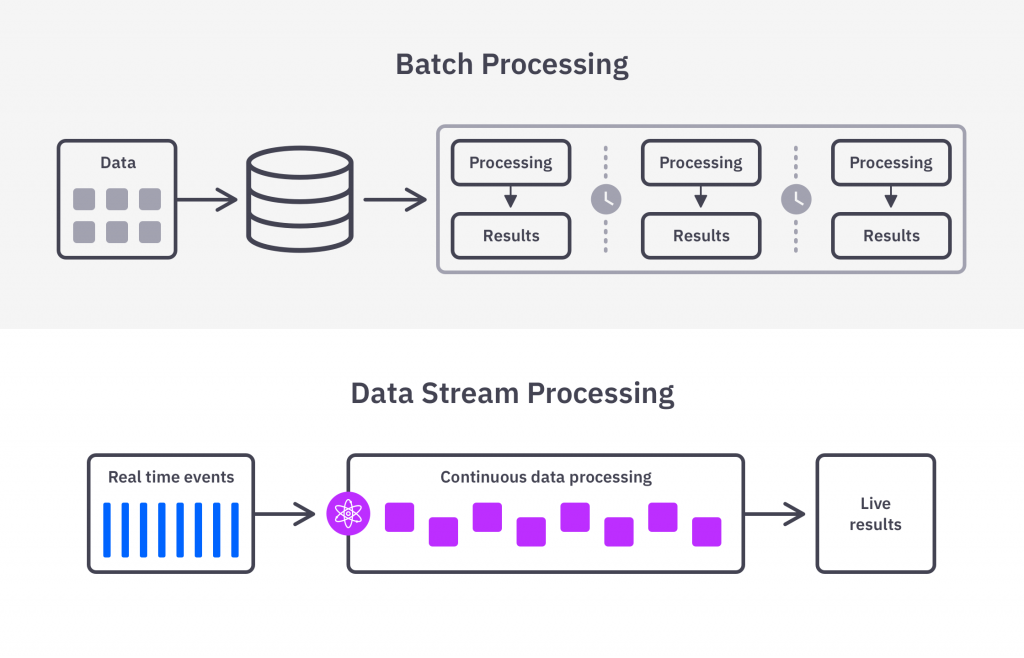

In [ ]:
# 배치 처리
x, t=get_data()
network=init_network()

batch_size=100 # 배치 크기
accuracy_cnt=0

for i in range (0, len(x), batch_size):
# range(start, end): start에서 end-1까지의 정수를 차례로 반환하는 반복자.
# range(start, end, step)

# x[i: i+batch_size]: 반환하는 반복자를 바탕으로 입력 데이터를 묶습니다.
# 입력 데이터의 i번째부터 i+batch_size번째까지의 데이터를 묶는다.

  x_batch=x[i : i+batch_size]
  y_batch=predict(network, x_batch)

  p=np.argmax(y_batch, axis=1)
  accuracy_cnt += np.sum(p == t[i: i+batch_size])
# 배치 단위로 분류한 결과를 실제 답과 비교합니다. 이를 위해 == 연산자를 사용해 넘파이 배열끼리
# 비교하여 True/False로 구성된 bool 배열을 만들고, 이 결과 배열에서 Truer가 몇 개인지 셉니다.

print("accuracy:" + str(float(accuracy_cnt)/len(x)))

In [8]:
list(range(0,10,3))

[0, 3, 6, 9]

In [13]:
import numpy as np
x=np.array([[0.1, 0.8, 0.1], # 0.8은 2번째 요소니까, print(y)의 1번째 요소는 1(2번째 요소-1)
            [0.3, 0.1, 0.6],
            [0.2, 0.5, 0.3],
            [0.8, 0.1, 0.1]])
y=np.argmax(x, axis=1)
print(y)

[1 2 1 0]


In [ ]:
# 데이터를 배치로 처리함으로써 효율적이고 빠르게 처리할 수 있습니다.
# 신경망은 각 층의 뉴련들이 다음 층의 뉴런으로 신호를 전달한다는 점에서 앞 장의 퍼셉트론과 같습니다.

# 하지만 다음 뉴런으로 갈 때 신호를 변화시키는 활성화 함수에 큰 차이가 있습니다.
# 신경망에서는 매끄럽게 변화하는 시그모이드 함수를, 퍼셉트론에서는 갑자기 변화하는 계단 함수를 활성화 함수로 사용했습니다.